In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Real estate.csv to Real estate.csv


In [4]:
df = pd.read_csv('Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
np.random.seed(42)

n_samples = 200

square_feet = np.random.randint(800, 3500, n_samples)
bedrooms = np.random.randint(1, 6, n_samples)
age = np.random.randint(0, 50, n_samples)
distance_to_city = np.random.uniform(1, 30, n_samples)

price = (square_feet * 150 +
         bedrooms * 10000 -
         age * 1000 -
         distance_to_city * 2000 +
         np.random.normal(0, 20000, n_samples))

data = pd.DataFrame({
    'square_feet': square_feet,
    'bedrooms': bedrooms,
    'age': age,
    'distance_to_city': distance_to_city,
    'price': price
})

print("\n✓ Dataset created!")
print(f"\nDataset shape: {data.shape}")
print("\nFirst 5 rows:")
print(data.head())


✓ Dataset created!

Dataset shape: (200, 5)

First 5 rows:
   square_feet  bedrooms  age  distance_to_city          price
0         1660         4   15         23.537261  228472.845029
1         2094         3   38         17.193723  254486.869489
2         1930         3    4         13.302438  319357.605009
3         1895         1   21         27.284277  229459.646538
4         2438         5   28          4.224727  358505.622940



DATA EXPLORATION

Dataset Statistics:
       square_feet    bedrooms         age  distance_to_city          price
count   200.000000  200.000000  200.000000        200.000000     200.000000
mean   2225.030000    2.900000   24.840000         15.490763  305836.810946
std     728.920175    1.403513   14.067118          8.641248  112064.000326
min     801.000000    1.000000    0.000000          1.329256   46961.983748
25%    1644.250000    2.000000   12.000000          7.880828  217464.708466
50%    2278.500000    3.000000   25.000000         15.370476  316488.014064
75%    2838.750000    4.000000   36.000000         22.999394  397479.731561
max    3495.000000    5.000000   49.000000         29.991813  534047.340752

Checking for missing values:
square_feet         0
bedrooms            0
age                 0
distance_to_city    0
price               0
dtype: int64


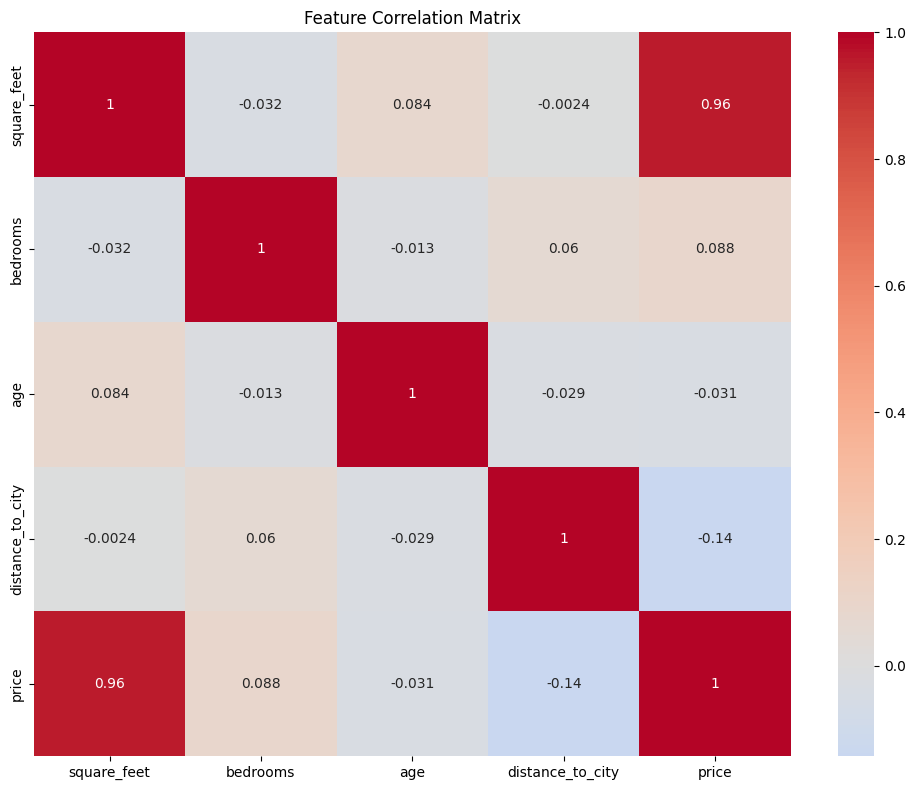

In [6]:
print("\n" + "="*50)
print("DATA EXPLORATION")
print("="*50)

print("\nDataset Statistics:")
print(data.describe())

print("\nChecking for missing values:")
print(data.isnull().sum())

# Visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

In [7]:
X = data[['square_feet', 'bedrooms', 'age', 'distance_to_city']]
y = data['price']

print("\n✓ Features (X) and target (y) separated")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


✓ Features (X) and target (y) separated
X shape: (200, 4)
y shape: (200,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\n✓ Data split into train and test sets")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")


✓ Data split into train and test sets
Training set: 160 samples
Testing set: 40 samples


In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

print("\n✓ Model trained successfully!")


✓ Model trained successfully!


In [10]:
print("\n" + "="*50)
print("MODEL PARAMETERS")
print("="*50)

print("\nIntercept (β₀):", f"{model.intercept_:,.2f}")
print("\nCoefficients (β₁, β₂, β₃, β₄):")
for feature, coef in zip(X.columns, model.coef_):
    print(f"  {feature:20s}: {coef:,.2f}")


MODEL PARAMETERS

Intercept (β₀): -10,697.74

Coefficients (β₁, β₂, β₃, β₄):
  square_feet         : 149.26
  bedrooms            : 11,487.33
  age                 : -781.81
  distance_to_city    : -1,936.08


In [11]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("\n✓ Predictions made!")


✓ Predictions made!


In [12]:
print("\n" + "="*50)
print("MODEL EVALUATION")
print("="*50)

# Training metrics
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)

print("\nTraining Set Performance:")
print(f"  R² Score: {train_r2:.4f}")
print(f"  RMSE: ${train_rmse:,.2f}")
print(f"  MAE: ${train_mae:,.2f}")

# Testing metrics
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)

print("\nTesting Set Performance:")
print(f"  R² Score: {test_r2:.4f}")
print(f"  RMSE: ${test_rmse:,.2f}")
print(f"  MAE: ${test_mae:,.2f}")


MODEL EVALUATION

Training Set Performance:
  R² Score: 0.9693
  RMSE: $20,187.11
  MAE: $16,277.83

Testing Set Performance:
  R² Score: 0.9568
  RMSE: $20,118.31
  MAE: $15,219.98


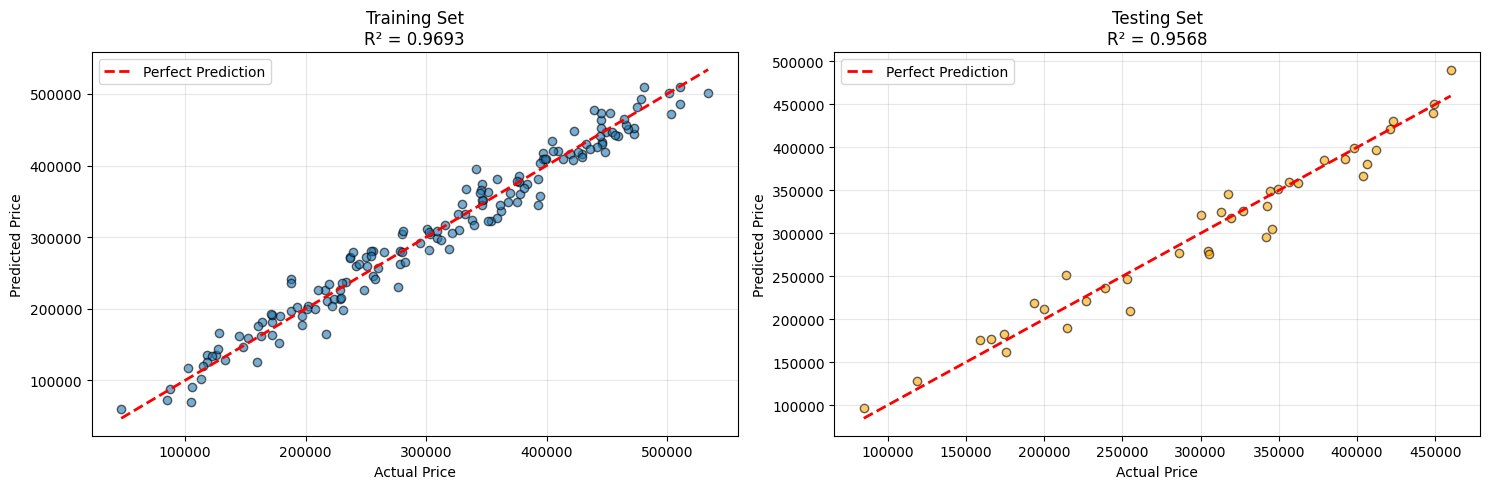

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Training set
axes[0].scatter(y_train, y_train_pred, alpha=0.6, edgecolors='k')
axes[0].plot([y_train.min(), y_train.max()],
             [y_train.min(), y_train.max()],
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')
axes[0].set_title(f'Training Set\nR² = {train_r2:.4f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Testing set
axes[1].scatter(y_test, y_test_pred, alpha=0.6, edgecolors='k', color='orange')
axes[1].plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Price')
axes[1].set_ylabel('Predicted Price')
axes[1].set_title(f'Testing Set\nR² = {test_r2:.4f}')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [14]:
print("\n" + "="*50)
print("MAKING NEW PREDICTIONS")
print("="*50)

# Example: predict price for a new house
new_house = pd.DataFrame({
    'square_feet': [2000],
    'bedrooms': [3],
    'age': [5],
    'distance_to_city': [10]
})

predicted_price = model.predict(new_house)[0]

print("\nNew house details:")
print(new_house.to_string(index=False))
print(f"\nPredicted price: ${predicted_price:,.2f}")


MAKING NEW PREDICTIONS

New house details:
 square_feet  bedrooms  age  distance_to_city
        2000         3    5                10

Predicted price: $299,012.11


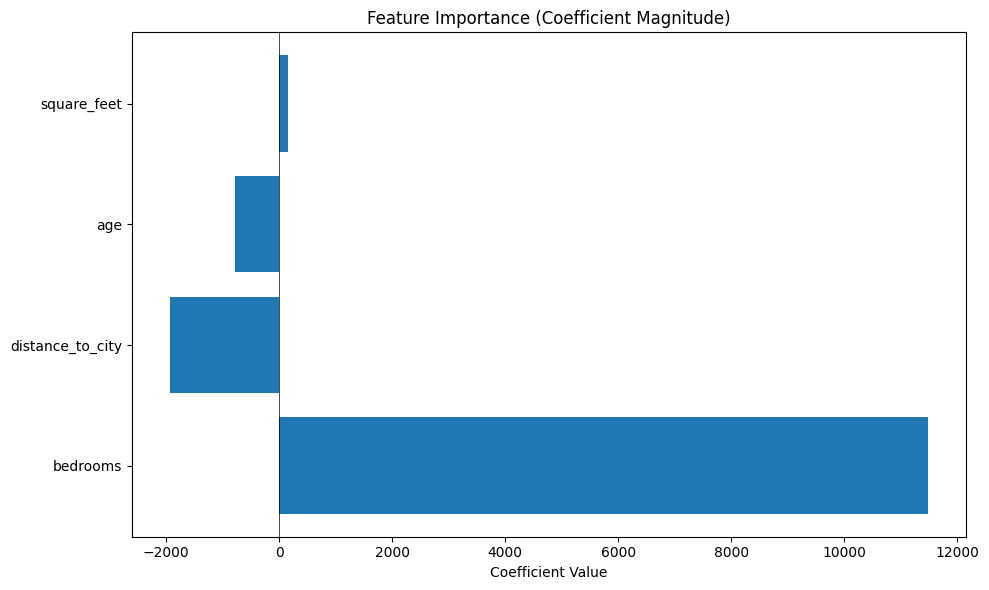


✓ LINEAR REGRESSION COMPLETE!


In [15]:
plt.figure(figsize=(10, 6))
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Coefficient Magnitude)')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("✓ LINEAR REGRESSION COMPLETE!")
print("="*50)